## 월별 상품 수요 예측
    - 월별 상품마다 매출액을 확인하여
    - 월 별로 전체 분포와 다른(수요가 많은) 상품을 확인해 수요 파악
    --> 콜옵션 수량 파악을 통해 낮은 단가로 안정적인 공급이 가능
    --> 장바구니에 그 상품을 담아 놓은 경우 할인 쿠폰도 제공 가능

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

In [ ]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

In [ ]:
kurly = pd.read_csv("kurly.csv")
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [ ]:
month_imn = kurly.groupby(["Month",'ItemMiddleName'])['Price'].sum().unstack()
month_imn['합계'] = np.sum(month_imn, axis=1)
month_imn

ItemMiddleName,곡물,과일,과자,냉동,생수,수산,신선,양념,음료,즉석,채소,축산,커피,탄산,합계
Month,,,,,,,,,,,,,,,
1,105873730,334648940,24320910,78989460,5283560,266736370,63928940,38200840,17184270,45930290,233911470,54192530,45571140,7722360,1322494810
2,92996970,298977850,21671150,71040320,4014200,234986210,56146590,34294160,15233250,40147740,204877160,48207500,40467320,6614840,1169675260
3,106533560,339856300,25077950,81376130,5312670,270497390,66074580,40486680,16497940,46278360,239378000,56160700,46727020,7687690,1347944970
4,101222100,325032590,23743390,75062550,4789450,257762380,60077100,38539660,15104720,45223650,229508350,52129050,44241810,6630520,1279067320
5,107263990,346930740,26081150,81554820,5032880,277809080,65471970,40501590,16792210,46363560,242776190,56794840,47918140,7205060,1368496220
6,102938210,329301290,23747050,76901650,5063310,262197020,62867350,37249690,14687670,44133000,230644370,53215790,43888560,7981020,1294815980
7,105822260,330317430,25311110,79020450,4914940,263973220,62936170,37732350,16203070,44645140,231955150,53202540,45983300,7368150,1309385280
8,108663110,344206180,25450400,78883330,5235720,274067120,64971620,42213080,18657100,47113680,242625640,57226500,48585330,7660160,1365558970
9,99387960,318598480,24314220,76905610,4828890,256937020,58599400,38143640,15851810,41888830,226736600,50679050,44487650,7444830,1264803990


In [ ]:
month_imn.columns

Index(['곡물', '과일', '과자', '냉동', '생수', '수산', '신선', '양념', '음료', '즉석', '채소', '축산',
       '커피', '탄산', '합계'],
      dtype='object', name='ItemMiddleName')

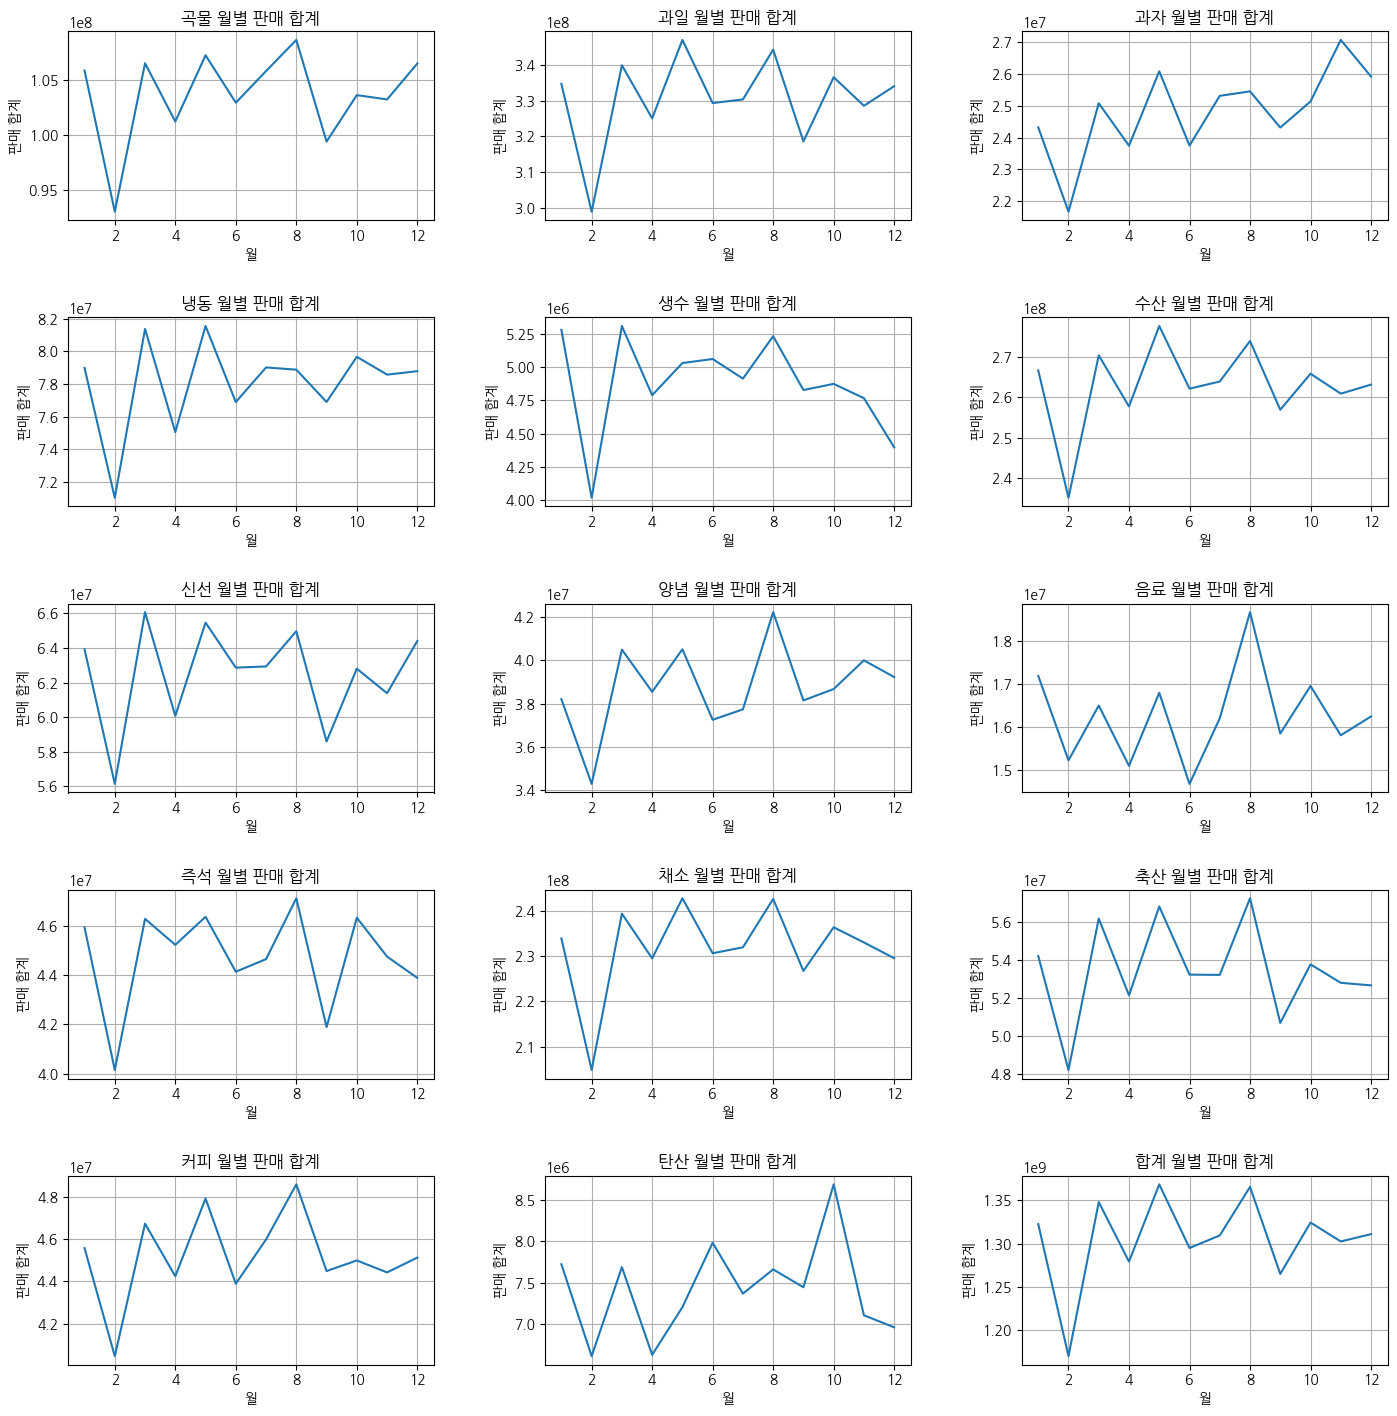

In [ ]:
# ItemMiddleName의 고유값을 가져옵니다.
unique_items = month_imn.columns  # '합계' 열을 제외한 모든 ItemMiddleName

# subplot의 행과 열의 수를 설정합니다. (여기서는 각 ItemMiddleName별로 한 개의 그래프를 그립니다.)
n_rows = len(unique_items) // 3 + len(unique_items) % 3
n_cols = 3

# 그래프의 크기를 설정합니다.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
fig.tight_layout(pad=5.0)

# 각 ItemMiddleName별로 그래프를 그립니다.
for i, item in enumerate(unique_items):
    ax = axes[i//n_cols, i%n_cols]
    month_imn[item].plot(ax=ax)
    ax.set_title(f'{item} 월별 판매 합계')
    ax.set_xlabel('월')
    ax.set_ylabel('판매 합계')
    ax.grid(True)

# 만약 subplot의 개수가 ItemMiddleName의 개수보다 많다면, 남은 subplot을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

<Axes: xlabel='Month', ylabel='과자'>

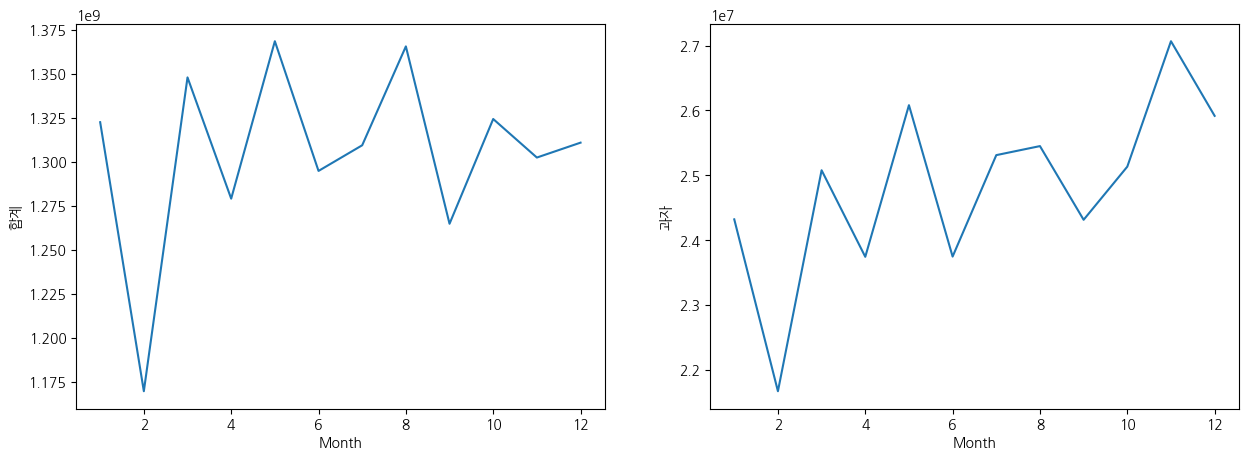

In [ ]:
plt.subplots(ncols=2, figsize=(15,5))
plt.subplot(121)
sns.lineplot(data=month_imn, x="Month", y='합계')
plt.subplot(122)
sns.lineplot(data=month_imn, x="Month", y='과자')

In [ ]:
df_1 = kurly[(kurly['ItemLargeName']=='신선식품') & ((kurly['ItemMiddleName']=='과일') | (kurly['ItemMiddleName']=='신선') | (kurly['ItemMiddleName']=='채소'))]

In [ ]:
df_2 = df_1.groupby(["Month",'ItemSmallName'])['Price'].sum().unstack()
df_2

ItemSmallName,고구,김치,깻잎,도라,딸기,배,블루,사과,상추,수박,참외,콩나,키위,토마,파,파프,풋고,호박
Month,,,,,,,,,,,,,,,,,,
1,62262970,63928940,516760,37845750,28711560,18142130,24945970,98901040,25699240,27405780,6801780,131860,40812500,62011120,24958080,26650040,11648780,36228070
2,55473130,56146590,573500,33380910,27149950,14749620,21131260,89206780,22617470,25476490,5210410,107530,37091280,54463390,21490680,21703580,10192550,31876200
3,63368190,66074580,656840,36733750,30074000,17169750,25618620,100678230,27545200,26345710,6451180,129910,40902190,65120940,26550760,25310200,11678430,38942530
4,60379120,60077100,610730,35661450,27444490,16202260,25374670,97811180,25858410,25764390,6755000,135170,38235180,60971320,24867070,25836750,11611180,36022490
5,66143450,65471970,672880,36668300,29083160,17605060,26963470,101105980,27450880,26843530,6831270,136270,42864040,67558440,25743740,26912820,11909840,38495080
6,59913990,62867350,632420,37077330,29590850,17116000,23941950,98804080,25653460,24368930,6679420,122620,41065190,61153180,25066630,24687280,12799740,36969570
7,60725290,62936170,620010,37059730,29412470,16570810,23803580,99319190,24379710,25434100,6481470,117010,39921950,63445040,24601650,26244970,11962620,38231350
8,63221300,64971620,674740,37998760,30228770,18267560,25951270,102316480,27534280,27084470,6000940,125940,42579160,63845440,25662360,26932600,11879450,39324800
9,58307640,58599400,583610,37420190,27130190,16719460,23217670,93902720,26402140,23229900,6503040,138580,39018600,62034560,23947640,25619810,10636670,35813290


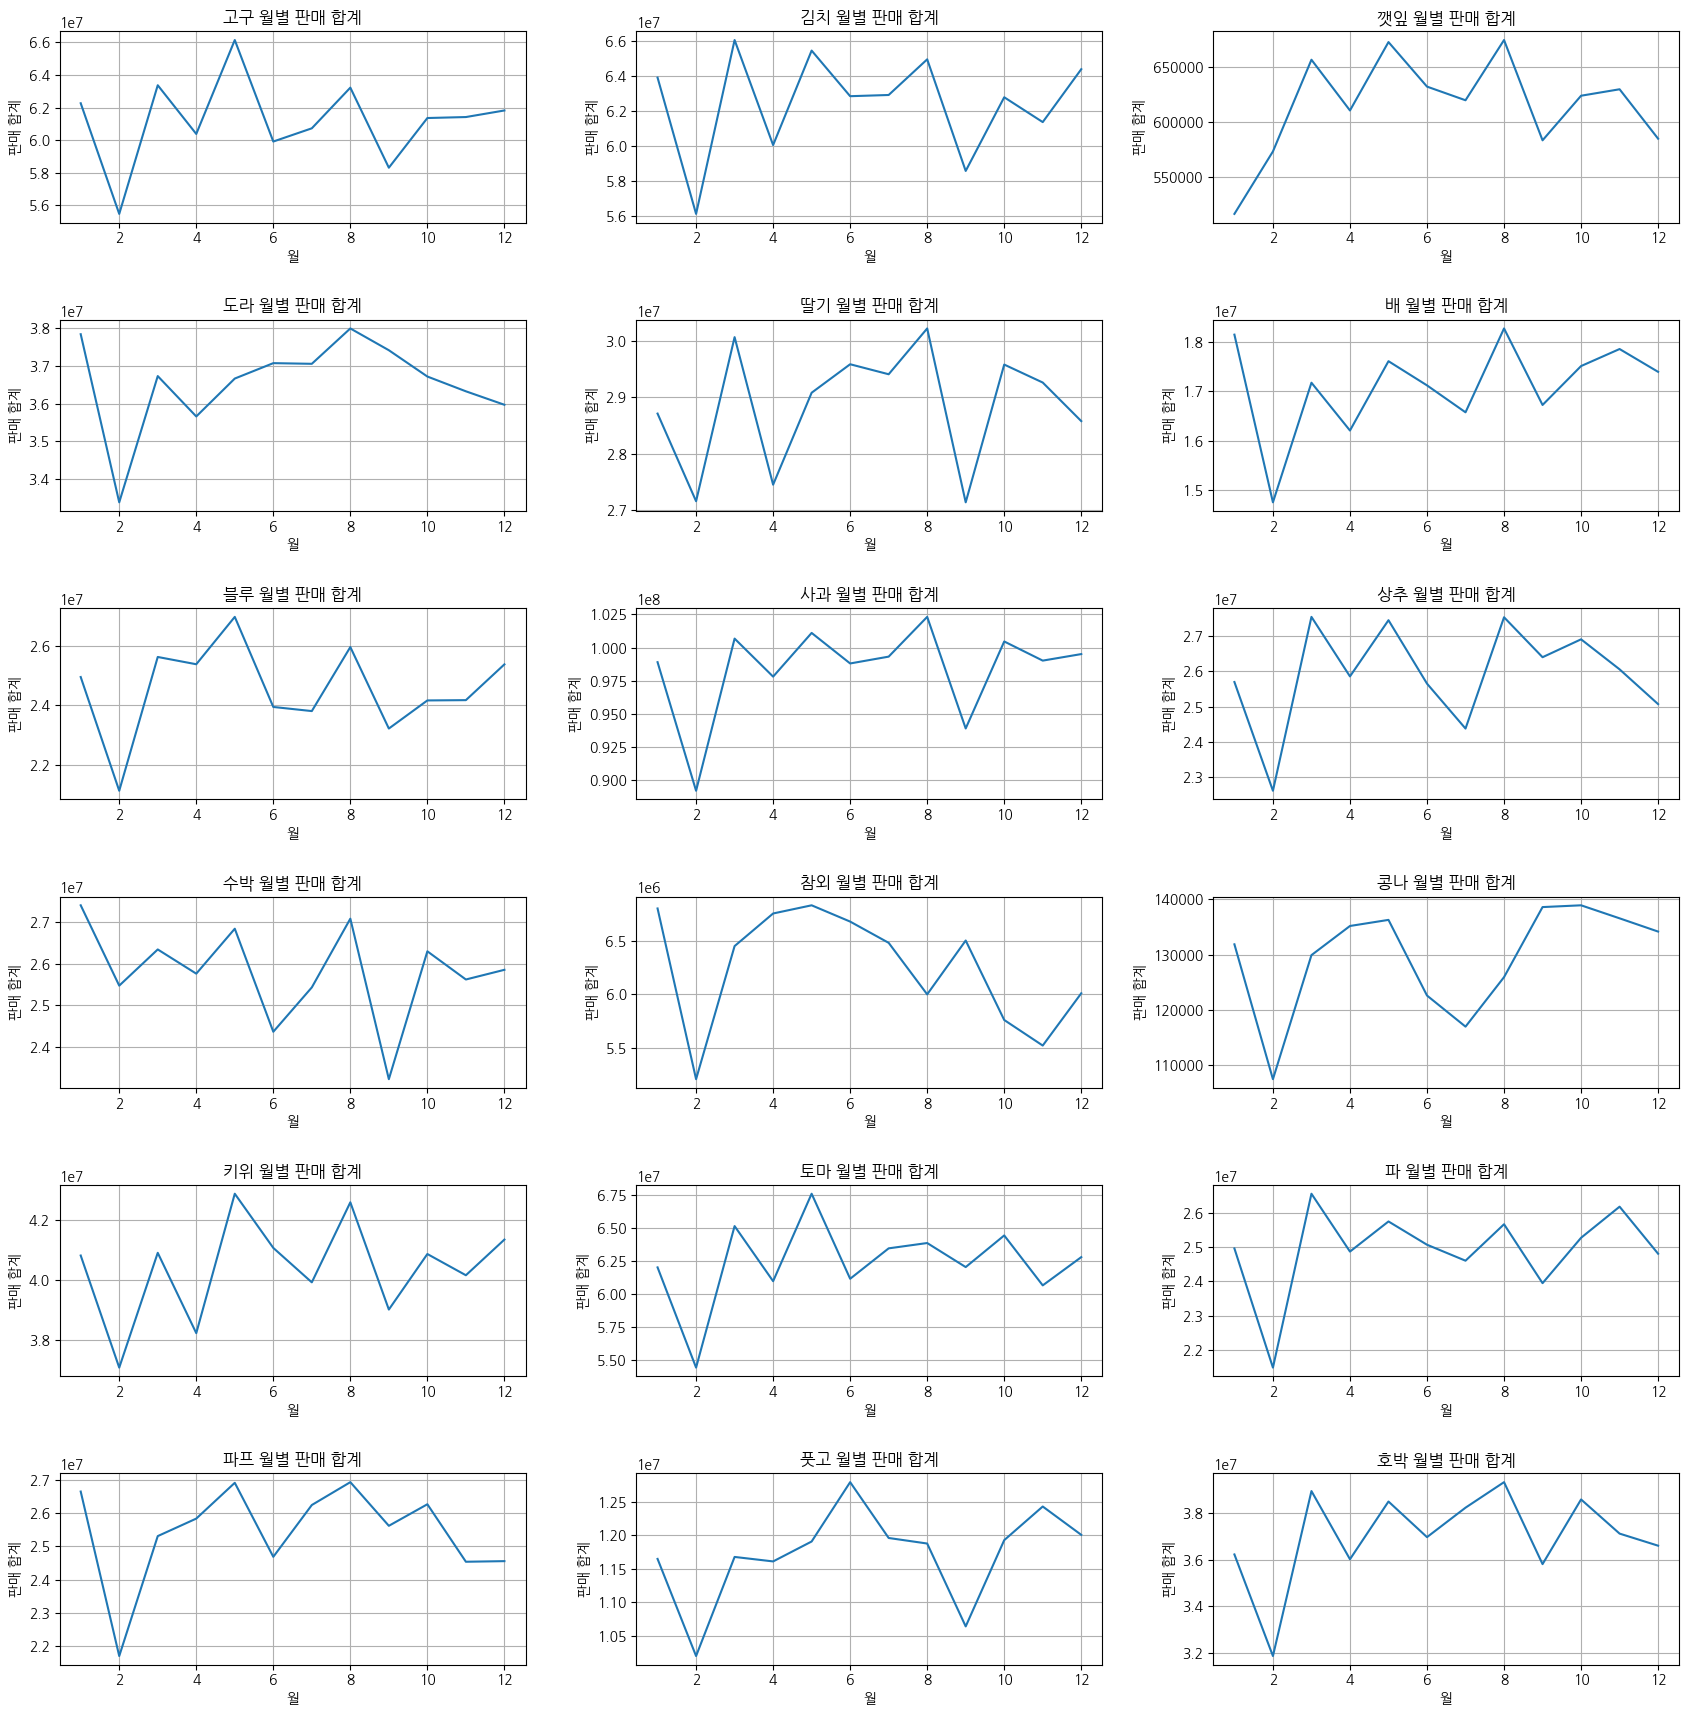

In [ ]:
# ItemMiddleName의 고유값을 가져옵니다.
unique_items = df_2.columns  # '합계' 열을 제외한 모든 ItemMiddleName

# subplot의 행과 열의 수를 설정합니다. (여기서는 각 ItemMiddleName별로 한 개의 그래프를 그립니다.)
n_rows = len(unique_items) // 3 + len(unique_items) % 3
n_cols = 3

# 그래프의 크기를 설정합니다.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*3))
fig.tight_layout(pad=5.0)

# 각 ItemMiddleName별로 그래프를 그립니다.
for i, item in enumerate(unique_items):
    ax = axes[i//n_cols, i%n_cols]
    df_2[item].plot(ax=ax)
    ax.set_title(f'{item} 월별 판매 합계')
    ax.set_xlabel('월')
    ax.set_ylabel('판매 합계')
    ax.grid(True)

# 만약 subplot의 개수가 ItemMiddleName의 개수보다 많다면, 남은 subplot을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

<Axes: xlabel='Month', ylabel='과자'>

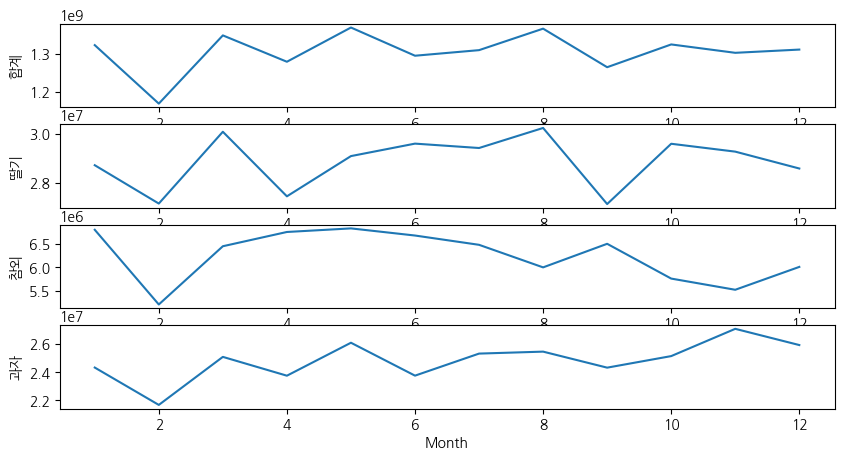

In [ ]:
plt.subplots(nrows=4, figsize=(10,5))
plt.subplot(411)
sns.lineplot(data=month_imn, x="Month", y='합계')
plt.subplot(412)
sns.lineplot(data=df_2, x="Month", y='딸기')
plt.subplot(413)
sns.lineplot(data=df_2, x="Month", y='참외')
plt.subplot(414)
sns.lineplot(data=month_imn, x="Month", y='과자')